In [4]:
import face_recognition

def is_same_person(image1_path, image2_path):
    # Load the first image and encode the face(s)
    image1 = face_recognition.load_image_file(image1_path)
    image1_encodings = face_recognition.face_encodings(image1)
    
    if not image1_encodings:
        print("No face found in the first image.")
        return False
    image1_encoding = image1_encodings[0]  # Use the first face encoding

    # Load the second image and encode the face(s)
    image2 = face_recognition.load_image_file(image2_path)
    image2_encodings = face_recognition.face_encodings(image2)
    
    if not image2_encodings:
        print("No face found in the second image.")
        return False

    # Compare the face from image1 to all faces in image2
    for image2_encoding in image2_encodings:
        match = face_recognition.compare_faces([image1_encoding], image2_encoding)
        if match[0]:
            return True  # Found a match
    
    return False  # No match found

In [28]:
# Example usage
babu1 = "images/babu1.jpeg"
babu2 = "images/babu2.jpeg"
allu1 = "images/allu1.jpeg"
allu2 = "images/allu2.jpeg"
allu3 = "images/allu3.jpeg"
allu4 = "images/allu4.jpeg"
allu5 = "images/allu5.jpeg"
allu6 = "images/allu6.jpg"
list = [allu1, allu2, allu5,allu6]
for i in range(len(list)):
    for j in range(i+1, len(list)):
        if is_same_person(list[i], list[j]):
            print("MATCHED!",list[i], list[j] )
        else:
            print("NO MATCH!",list[i], list[j])

MATCHED! images/allu1.jpeg images/allu2.jpeg
MATCHED! images/allu1.jpeg images/allu5.jpeg
MATCHED! images/allu1.jpeg images/allu6.jpg
MATCHED! images/allu2.jpeg images/allu5.jpeg
MATCHED! images/allu2.jpeg images/allu6.jpg
MATCHED! images/allu5.jpeg images/allu6.jpg


In [17]:
len(list)

4

In [19]:
for i in range(len(list)):
    for j in range(i+1, len(list)):
        print("MATCHing",i, j )

MATCHing 0 1
MATCHing 0 2
MATCHing 0 3
MATCHing 1 2
MATCHing 1 3
MATCHing 2 3


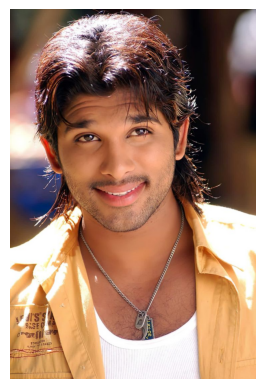

matched with:


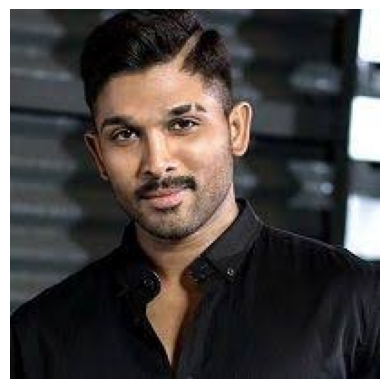

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
# img_path = 'path_to_your_image.jpg'

# Load and display the image
img = mpimg.imread(allu6)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
print("matched with:")
img = mpimg.imread(allu2)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [33]:
import face_recognition

def is_same_person(image1_path, image2_path):
    # Load the first image and encode the faces
    image1 = face_recognition.load_image_file(image1_path)
    image1_encodings = face_recognition.face_encodings(image1)
    
    if not image1_encodings:
        print("No face found in the first image.")
        return False

    # Load the second image and encode the faces
    image2 = face_recognition.load_image_file(image2_path)
    image2_encodings = face_recognition.face_encodings(image2)
    
    if not image2_encodings:
        print("No face found in the second image.")
        return False

    # Compare each face from the first image to all faces in the second image
    for image1_encoding in image1_encodings:
        for image2_encoding in image2_encodings:
            match = face_recognition.compare_faces([image1_encoding], image2_encoding)
            if match[0]:
                return True  # Found a match
    
    return False  # No match found

# Example usage
image1_path = "image1.jpg"  # Replace with the path to the first image
image2_path = "image2.jpg"  # Replace with the path to the second image

if is_same_person(allu1, allu4):
    print("At least one person in the first image is also in the second image.")
else:
    print("No match found between the images.")


No face found in the second image.
No match found between the images.


Number of faces detected: 2


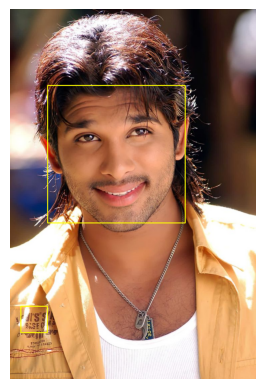

In [50]:
import cv2

def detect_and_outline_faces(image_path):
    # Load the pre-trained face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale (needed for face detection)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around each detected face
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)  # Blue rectangles

    # Print the number of faces detected
    print(f"Number of faces detected: {len(faces)}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with detected faces
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage
image_path = "image.jpg"  # Replace with your image path
detect_and_outline_faces(allu6)
